# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Normalization
from sklearn import metrics

In [2]:
#data=pd.read_csv(r'G:\.shortcut-targets-by-id\1vOlQXUHyCZ-f5E7VekJd3EhnwPwKwDQO\Nitul\data\Final\Final_v3.0.csv') # read the data

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
file_path = "/content/drive/My Drive/Nitul/Final_Organized_Cherry_Project/data/Final_v3.0.csv"
data = pd.read_csv(file_path)

In [4]:
data.tail(6) #seeing the data

,Year,Dec,Jan,Feb,Perc_win,MT,SurTempCh,climate_in,bloom_day
37,2018,17,14,19,6.04,40.07,1.276,19,95
38,2019,20,11,17,6.23,40.97,1.034,20,91
39,2020,19,17,22,12.64,42.80,1.324,23,80
40,2021,20,14,10,9.28,39.27,1.144,43,87
41,2022,24,7,18,11.55,41.60,1.217,25,80
42,2023,19,23,22,6.64,44.00,1.199,28,82


In [5]:
data.shape

(43, 9)

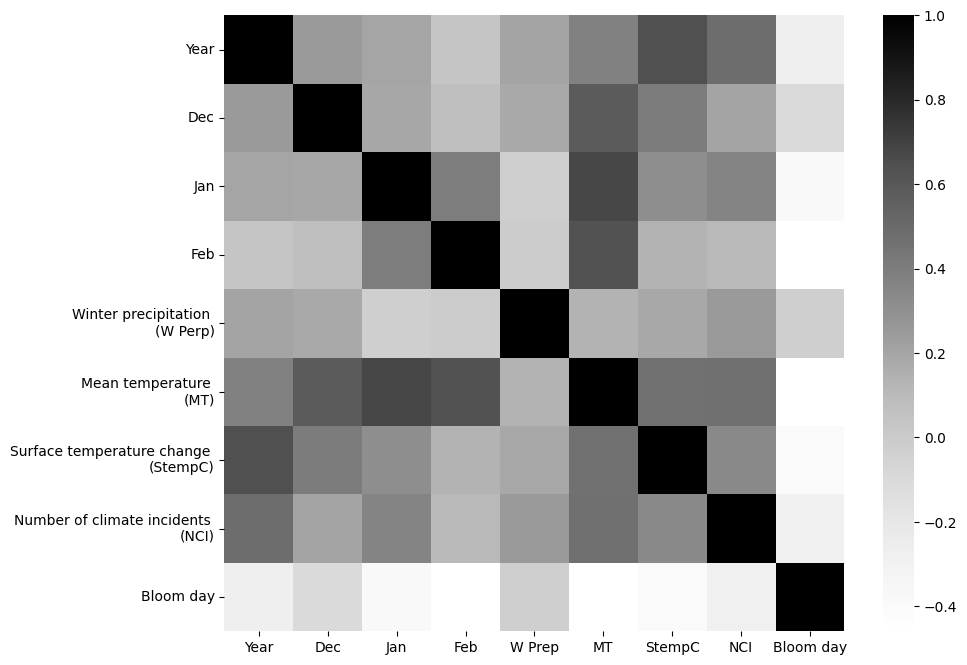

In [6]:
df=data.copy()
# Change the column names to match your variables
df.columns = ['Year', 'Dec', 'Jan', 'Feb', 'Winter precipitation', 'Mean temperature', 'Surface temperature change', 'Number of climate incidents', 'Bloom day']

# Create a custom color palette with grayscale colors
cmap = sns.color_palette("Greys", as_cmap=True)

# Increase the figure size to avoid overlapping
plt.figure(figsize=(10, 8))

# Plot the heatmap with horizontal variable names
heatmap = sns.heatmap(df.corr(), cmap=cmap, xticklabels=df.columns, yticklabels=df.columns)

# Rotate x-axis labels slightly more
heatmap.tick_params(axis='x', rotation=0)


# Manually break x-axis labels into two lines
heatmap.set_xticklabels(['Year', 'Dec', 'Jan', 'Feb', 'W Prep', 'MT', 'StempC','NCI' , 'Bloom day'])
heatmap.set_yticklabels(['Year', 'Dec', 'Jan', 'Feb', 'Winter precipitation \n(W Perp)', 'Mean temperature \n(MT)', 'Surface temperature change \n(StempC)', 'Number of climate incidents \n(NCI)', 'Bloom day'])


# Show the plot
plt.show()

# Split Data

In [7]:
df.corr()

,Year,Dec,Jan,Feb,Winter precipitation,Mean temperature,Surface temperature change,Number of climate incidents,Bloom day
Year,1.000000,0.250368,0.197841,0.042284,0.206494,0.383480,0.644622,0.484945,-0.268153
Dec,0.250368,1.000000,0.196054,0.074905,0.184518,0.587818,0.404215,0.206562,-0.095413
Jan,0.197841,0.196054,1.000000,0.400123,-0.030185,0.677087,0.314109,0.365247,-0.380142
Feb,0.042284,0.074905,0.400123,1.000000,-0.007150,0.631221,0.135018,0.107074,-0.456461
Winter precipitation,0.206494,0.184518,-0.030185,-0.007150,1.000000,0.138079,0.190166,0.249884,-0.029525
Mean temperature,0.383480,0.587818,0.677087,0.631221,0.138079,1.000000,0.460971,0.465414,-0.458953
Surface temperature change,0.644622,0.404215,0.314109,0.135018,0.190166,0.460971,1.000000,0.337197,-0.399544
Number of climate incidents,0.484945,0.206562,0.365247,0.107074,0.249884,0.465414,0.337197,1.000000,-0.275742
Bloom day,-0.268153,-0.095413,-0.380142,-0.456461,-0.029525,-0.458953,-0.399544,-0.275742,1.000000


In [8]:
scaler = MinMaxScaler()
scaler.fit(data[data.columns.difference(['bloom_day','Year','climate_in'])])
X=scaler.transform(data[data.columns.difference(['bloom_day','Year','climate_in'])])

target_X=X[len(X)-1:] # keep the 2023 aside
X=X[:len(X)-1] # Drop data point for 2023

y=np.array(data['bloom_day'])
y=y[:len(y)-1] # Drop data point for 2023

# Calculate the index to split the data
split_index = int(len(X) * 0.9)

# Split the data
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]



# Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [10]:
coeff_df = pd.DataFrame(lm.coef_,['Dec', 'Jan', 'Feb', 'Perc_win', 'MT', 'SurTempCh'],columns=['Coefficient'])
coeff_df

,Coefficient
Dec,4.541909
Jan,-8.244202
Feb,-3.829548
Perc_win,-1.605285
MT,3.567597
SurTempCh,-11.043844


In [ ]:
predictions = lm.predict(X_test)
predictions

array([85.67658856, 88.46912782, 85.91948799, 91.52896835, 90.38728702])

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.538005397092624
MSE: 51.35578779211413
RMSE: 7.1662952626942555


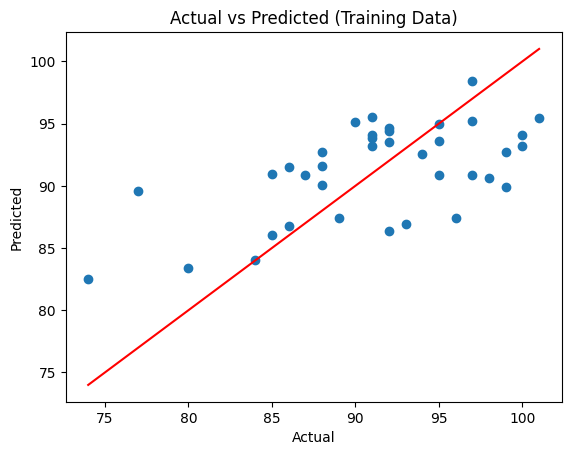

In [ ]:
# Make predictions on the training data
y_pred_train = lm.predict(X_train)

# Plot the actual vs predicted values
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Training Data)')

# Add regression line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red')  # Regression line

plt.show()

In [ ]:
target_X

array([[0.57692308, 0.9047619 , 0.90909091, 1.        , 0.31558935,
        0.60070121]])

In [ ]:

prediction_lm = lm.predict(target_X)
prediction_lm

array([83.18546016])

In [ ]:

import statsmodels.api as sm
from scipy.stats import t

y_pred=prediction_lm
# Calculate residuals and degrees of freedom
df = len(y_train) - 6 - 1

# Calculate standard error of the estimate (SE)
y_hat_train=lm.predict(X_train)
se =np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))

# Calculate t-value for 95% CI
t_value = t.ppf(0.975, df)

# Calculate lower and upper bounds of the CI
lower_bound = y_pred - t_value * se
upper_bound = y_pred + t_value * se

# Print the confidence interval
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


95% Confidence Interval: ([72.86849804], [93.50242229])


# Time Series Model

In [ ]:
# from statsmodels.tsa.arima.model import ARIMA

# # Assuming y_train is your time series data and x_train contains exogenous predictors
# # Specify the order of the ARIMA model and include exogenous variables
# arima_order = (2, 1, 2)  # Example ARIMA order
# exog_vars = X_train  # Exogenous variables from x_train

# # Create ARIMAX model
# arimax_model = ARIMA(y_train, order=arima_order, exog=exog_vars)

# # Fit the ARIMAX model
# arimax_result = arimax_model.fit()

# # Forecast using the ARIMAX model
# forecast_steps = 5  # Number of steps to forecast
# arimax_forecast = arimax_result.get_forecast(steps=forecast_steps, exog=X_test)

# # Extract forecast values and confidence intervals
# forecast_values = arimax_forecast.predicted_mean
# confidence_intervals = arimax_forecast.conf_int(alpha=0.05)  # 95% confidence interval

# # Print forecast values and confidence intervals
# print("Forecast Values:")
# print(forecast_values)
# print("\n95% Confidence Intervals:")
# print(confidence_intervals)


Forecast Values:
[84.36688315 88.48033436 84.78971812 91.93937297 88.02242239]

95% Confidence Intervals:
[[ 74.57849906  94.15526723]
 [ 78.31241102  98.6482577 ]
 [ 74.54845068  95.03098555]
 [ 81.70264726 102.17609867]
 [ 77.77190588  98.27293889]]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming y_train is your time series data and x_train contains exogenous predictors
# Specify the order of the ARIMA model and include exogenous variables
arima_order = (2, 1, 2)  # Example ARIMA order
exog_vars = X_train  # Exogenous variables from x_train

# Create ARIMAX model
arimax_model = ARIMA(y_train, order=arima_order, exog=exog_vars)

# Fit the ARIMAX model
arimax_result = arimax_model.fit()

# Print parameter estimates
print("Parameter Estimates:")
print(arimax_result.params)

# Forecast using the ARIMAX model
forecast_steps = 5  # Number of steps to forecast
arimax_forecast = arimax_result.get_forecast(steps=forecast_steps, exog=X_test)

# Extract forecast values and confidence intervals
forecast_values = arimax_forecast.predicted_mean
confidence_intervals = arimax_forecast.conf_int(alpha=0.05)  # 95% confidence interval

# Print forecast values and confidence intervals
print("\nForecast Values:")
print(forecast_values)
print("\n95% Confidence Intervals:")
print(confidence_intervals)


Parameter Estimates:
[ 4.80381038e+00 -5.92599145e+00 -9.28567577e-01 -5.37631584e+00
  3.89431724e+00 -1.18631529e+01 -7.19767164e-01  2.79858894e-01
 -7.08524729e-03 -9.92900516e-01  2.39414174e+01]

Forecast Values:
[84.36688315 88.48033436 84.78971812 91.93937297 88.02242239]

95% Confidence Intervals:
[[ 74.57849906  94.15526723]
 [ 78.31241102  98.6482577 ]
 [ 74.54845068  95.03098555]
 [ 81.70264726 102.17609867]
 [ 77.77190588  98.27293889]]


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, forecast_values))
print('MSE:', metrics.mean_squared_error(y_test, forecast_values))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, forecast_values)))

NameError: name 'metrics' is not defined

In [ ]:
#2023
# Forecast using the ARIMAX model
forecast_steps = 1  # Number of steps to forecast
arimax_forecast = arimax_result.get_forecast(steps=forecast_steps, exog=target_X)

# Extract forecast values and confidence intervals
forecast_values = arimax_forecast.predicted_mean
confidence_intervals = arimax_forecast.conf_int(alpha=0.05)  # 95% confidence interval

# Print forecast values and confidence intervals
print("Forecast Value 2023")
print(forecast_values)
print("\n95% Confidence Interval 2023")
print(confidence_intervals)

Forecast Value 2023
[82.0590803]

95% Confidence Interval 2023
[[72.28049569 91.8376649 ]]


 # Deep Learning - LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
# Prepare data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
target_X = np.reshape(target_X, (target_X.shape[0], 1, target_X.shape[1]))

In [ ]:
# Define and fit the model
model = Sequential()
model.add(LSTM(37, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.1))
model.add(LSTM(74, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(74, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(37, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=1000,batch_size=4, validation_data=(X_test, y_test))

Epoch 1/1000
10/10 [==============================] - 10s 97ms/step - loss: 8358.4326 - val_loss: 7531.5303
Epoch 2/1000
10/10 [==============================] - 0s 16ms/step - loss: 8354.4355 - val_loss: 7527.1143
Epoch 3/1000
10/10 [==============================] - 0s 15ms/step - loss: 8349.2598 - val_loss: 7520.6001
Epoch 4/1000
10/10 [==============================] - 0s 17ms/step - loss: 8340.5342 - val_loss: 7508.1455
Epoch 5/1000
10/10 [==============================] - 0s 15ms/step - loss: 8324.3037 - val_loss: 7476.2666
Epoch 6/1000
10/10 [==============================] - 0s 16ms/step - loss: 8272.4463 - val_loss: 7360.2593
Epoch 7/1000
10/10 [==============================] - 0s 17ms/step - loss: 8068.0117 - val_loss: 6798.1709
Epoch 8/1000
10/10 [==============================] - 0s 20ms/step - loss: 7323.3276 - val_loss: 4148.1094
Epoch 9/1000
10/10 [==============================] - 0s 16ms/step - loss: 4290.4160 - val_loss: 754.7361
Epoch 10/1000
10/10 [================

In [ ]:

prediction = model.predict(X_test).flatten()
print((prediction,y_test))

1/1 [==============================] - 1s 546ms/step
(array([87.9183  , 88.60144 , 87.684654, 89.12167 , 88.991936],
      dtype=float32), array([95, 91, 80, 87, 80]))


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 5.655705261230469
MSE: 40.062785144185185
RMSE: 6.3295169755823535


In [ ]:
predicted_PBD = model.predict(target_X).flatten()
print(predicted_PBD)

1/1 [==============================] - 0s 22ms/step
[87.0333]


In [ ]:

import statsmodels.api as sm
from scipy.stats import t

y_pred=predicted_PBD
# Calculate residuals and degrees of freedom
df = len(y_train) - 6 - 1

# Calculate standard error of the estimate (SE)
y_hat_train=model.predict(X_train).flatten()
se =np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))

# Calculate t-value for 95% CI
t_value = t.ppf(0.975, df)

# Calculate lower and upper bounds of the CI
lower_bound = y_pred - t_value * se
upper_bound = y_pred + t_value * se

# Print the confidence interval
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


2/2 [==============================] - 0s 6ms/step
95% Confidence Interval: ([74.5842], [99.48241])


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Decision Tree Regression
print("Decision Tree Regression:")
# Initialize the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
# Fit the model
dt_regressor.fit(X_train, y_train)
# Predict
y_pred_dt = dt_regressor.predict(X_test)
# Evaluate
mse_dt = mean_squared_error(y_test, y_pred_dt)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)))


Decision Tree Regression:
MAE: 4.2
MSE: 19.4
RMSE: 4.404543109109048


In [ ]:
dt_regressor.predict(target_X)

array([92.])

In [ ]:
y_pred_dt

array([99., 87., 86., 89., 85.])

In [ ]:


y_pred=dt_regressor.predict(target_X)
# Calculate residuals and degrees of freedom
df = len(y_train) - 6 - 1

# Calculate standard error of the estimate (SE)
y_hat_train=dt_regressor.predict(X_train)
se =np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))

# Calculate t-value for 95% CI
t_value = t.ppf(0.975, df)

# Calculate lower and upper bounds of the CI
lower_bound = y_pred - t_value * se
upper_bound = y_pred + t_value * se

# Print the confidence interval
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


95% Confidence Interval: ([92.], [92.])


In [ ]:
se

0.0

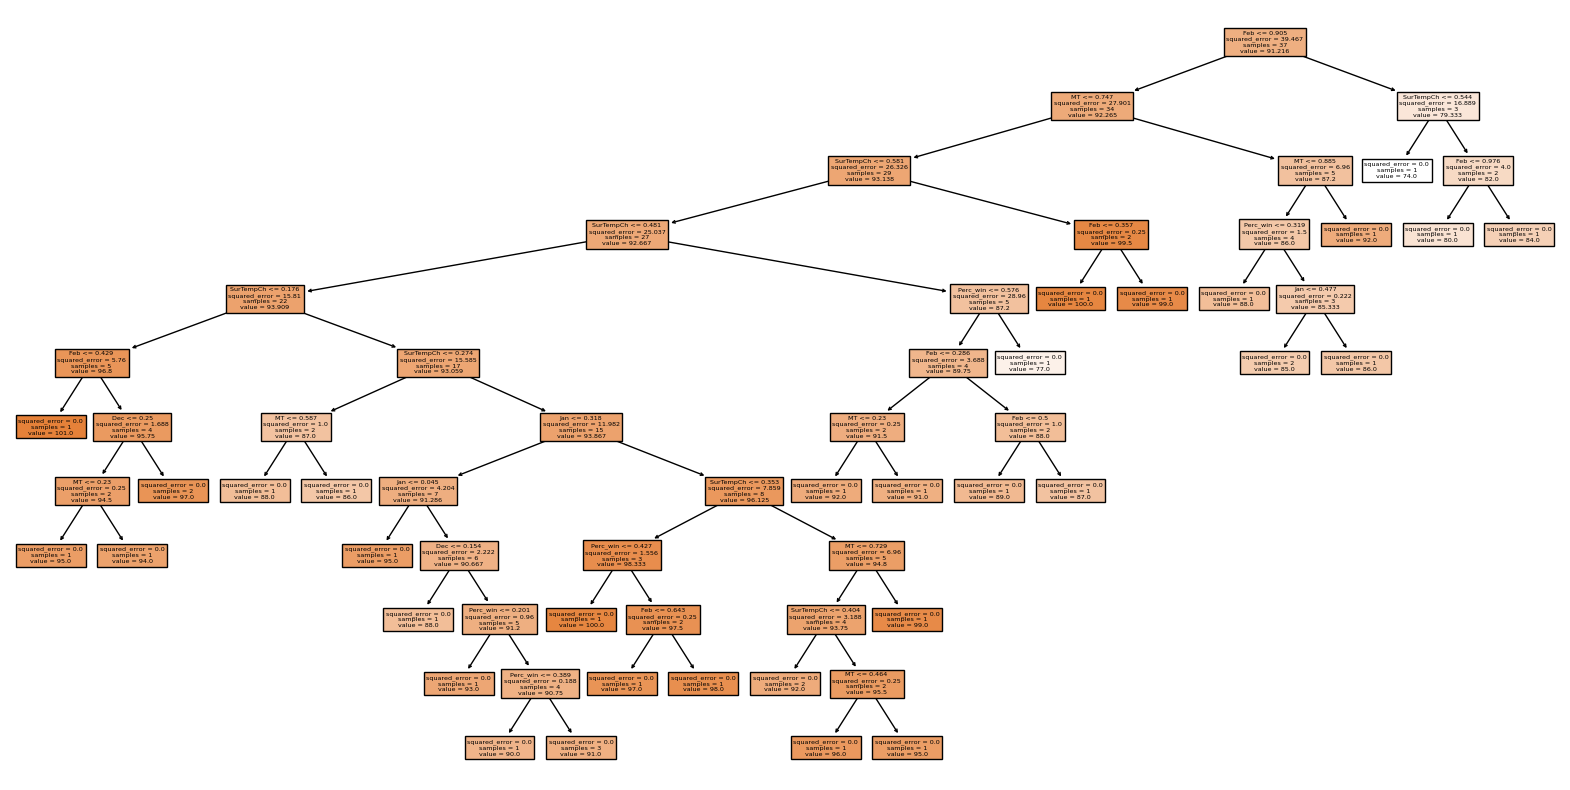

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=data.columns.difference(['bloom_day', 'Year', 'climate_in']))
plt.show()

In [ ]:
# tree_depth = dt_regressor.max_depth
# num_features_used = dt_regressor.n_features_
# feature_importance = dt_regressor.feature_importances_


# Get tree depth
tree_depth = dt_regressor.get_depth()

# Get number of features used
num_features_used = sum(dt_regressor.feature_importances_ > 0)
num_features_used

6

In [ ]:
tree_depth

11

# Random Forest Regression

In [ ]:
from sklearn.impute import SimpleImputer

# Fitting Random Forest Regression to the dataset
regressor1 = RandomForestRegressor(n_estimators=6, random_state=0, oob_score=True)

# Fit the regressor with X and y data
regressor1.fit(X_train, y_train)

from sklearn.impute import SimpleImputer
y_pred_RF = regressor1.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
y_pred_RF

array([83.        , 77.5       , 86.        , 90.66666667, 87.16666667])

In [ ]:
number_of_trees = len(regressor1.estimators_)
print(f'The number of trees in the Random Forest model: {number_of_trees}')


The number of trees in the Random Forest model: 6


In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_RF))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_RF))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RF)))

MAE: 8.466666666666669
MSE: 85.41111111111113
RMSE: 9.241813193909035


In [ ]:
from scipy.stats import t

y_pred=regressor1.predict(target_X)
# Calculate residuals and degrees of freedom
df = len(y_train) - 6 - 1

# Calculate standard error of the estimate (SE)
y_hat_train=regressor1.predict(X_train)
se =np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))

# Calculate t-value for 95% CI
t_value = t.ppf(0.975, df)

# Calculate lower and upper bounds of the CI
lower_bound = y_pred - t_value * se
upper_bound = y_pred + t_value * se

# Print the confidence interval
print(f"2023 prediction: ({y_pred})")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


2023 prediction: ([83.33333333])
95% Confidence Interval: ([78.73966859], [87.92699807])


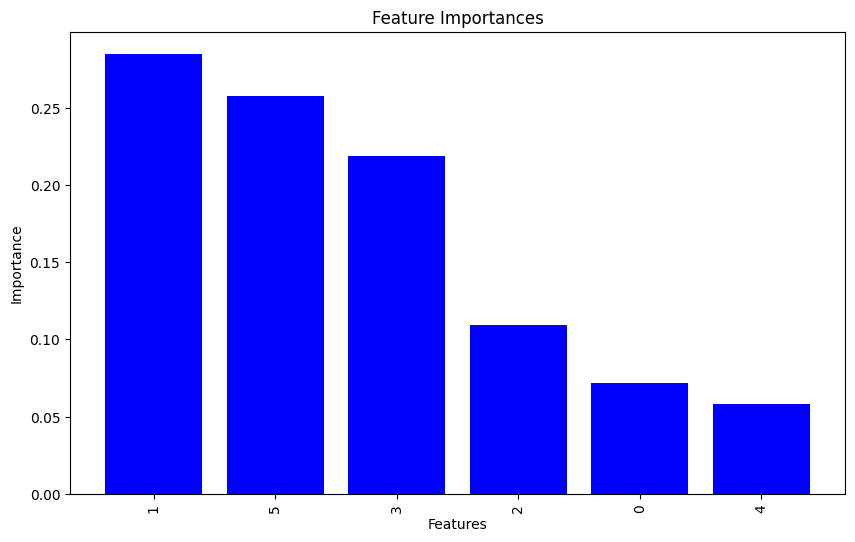

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the trained random forest model
feature_importances = regressor1.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(feature_importances)), feature_importances[indices], color="b", align="center")
plt.xticks(range(len(feature_importances)), indices, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


# XGBoost Regression

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score
from xgboost import XGBRegressor

# define model
model_XG = XGBRegressor()
# fit model
model_XG.fit(X_train, y_train)

# make a prediction
yhat = model_XG.predict(X_test)
# summarize prediction
print( yhat)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, yhat))
print('MSE:', metrics.mean_squared_error(y_test, yhat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yhat)))



[86.215195 83.85643  87.3147   92.48704  83.21076 ]
MAE: 6.388174438476563
MSE: 44.42495336572174
RMSE: 6.665204675456091


In [ ]:


y_pred=model_XG.predict(target_X)
# Calculate residuals and degrees of freedom
df = len(y_train) - 6 - 1

# Calculate standard error of the estimate (SE)
y_hat_train=model_XG.predict(X_train)
se =np.sqrt(metrics.mean_squared_error(y_train, y_hat_train))

# Calculate t-value for 95% CI
t_value = t.ppf(0.975, df)

# Calculate lower and upper bounds of the CI
lower_bound = y_pred - t_value * se
upper_bound = y_pred + t_value * se

# Print the confidence interval
print(f"2023 prediction: ({y_pred})")
print(f"95% Confidence Interval: ({lower_bound}, {upper_bound})")


2023 prediction: ([87.313255])
95% Confidence Interval: ([87.31184], [87.314674])


<Figure size 2000x1000 with 0 Axes>

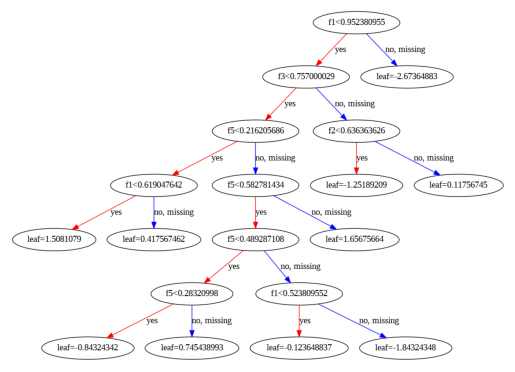

In [ ]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model_XG, num_trees=0)
plt.show()
